<a href="https://colab.research.google.com/github/kakwan1111/Applied-Data-Science-Capstone/blob/master/9969_(David_Wong).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries**

In [ ]:
import pip

def import_or_install(numpy):
    try:
        __import__(numpy)
    except ImportError:
        pip.main(['install', numpy])  

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib.pyplot 
!pip install yfinance 
!pip install plotly.express
!pip install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173804 sha256=bd6b55f05aec917a6792b6f63

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import datetime


In [ ]:
>>> from datetime import date, timedelta
>>> yesterday = date.today() - timedelta(days=1)
>>> yesterday.strftime('%m%d%y')
print(yesterday)

2023-05-11


## **Define input parameters**

In [ ]:
stock_symbol = '9988.hk'
start_date = '2019-09-19'
end_date = yesterday
window1 = 50
window2 = 150
mystock = yf.download(stock_symbol,start=start_date, end = end_date ,progress=False)
mystock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-26,187.000000,189.500000,187.000000,187.600006,187.600006,74549578
2019-11-27,190.000000,195.300003,189.300003,193.199997,193.199997,53617241
2019-11-28,197.000000,204.199997,196.899994,204.000000,204.000000,41816834
2019-11-29,204.000000,204.800003,197.500000,198.399994,198.399994,36509531
2019-12-02,198.000000,198.899994,194.000000,195.500000,195.500000,26592325
...,...,...,...,...,...,...
2023-05-04,80.500000,81.449997,80.349998,80.699997,80.699997,34428742
2023-05-05,82.000000,82.449997,81.099998,81.650002,81.650002,33666492
2023-05-08,81.650002,82.400002,81.400002,81.949997,81.949997,40005891


## **Moving Average 1 (Shorter window)**

In [ ]:
print(window1)
sma1 = pd.DataFrame()
sma1['Adj Close'] = mystock['Adj Close'].rolling(window = window1).mean()
sma1

50


,Adj Close
Date,
2019-11-26,NaN
2019-11-27,NaN
2019-11-28,NaN
2019-11-29,NaN
2019-12-02,NaN
...,...
2023-05-04,88.514001
2023-05-05,88.159001
2023-05-08,87.894001


## **Moving Average 2 (Longer Window)**

In [ ]:
print(window2)
sma2 = pd.DataFrame()
sma2['Adj Close'] = mystock['Adj Close'].rolling(window = window2).mean()
sma2

150


,Adj Close
Date,
2019-11-26,NaN
2019-11-27,NaN
2019-11-28,NaN
2019-11-29,NaN
2019-12-02,NaN
...,...
2023-05-04,87.147667
2023-05-05,87.153000
2023-05-08,87.176667


## **Combine MA1 + MA2**

In [ ]:
data = pd.DataFrame()
data['ClosingPrice'] = mystock['Adj Close']
data['SMA'+str(window1)] = sma1['Adj Close']
data['SMA'+str(window2)] = sma2['Adj Close']
data

,ClosingPrice,SMA50,SMA150
Date,,,
2019-11-26,187.600006,NaN,NaN
2019-11-27,193.199997,NaN,NaN
2019-11-28,204.000000,NaN,NaN
2019-11-29,198.399994,NaN,NaN
2019-12-02,195.500000,NaN,NaN
...,...,...,...
2023-05-04,80.699997,88.514001,87.147667
2023-05-05,81.650002,88.159001,87.153000
2023-05-08,81.949997,87.894001,87.176667


## **Strategy to generate buy/sell signal**

In [ ]:
def dualMACrossover(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1 # Flag denoting when the 2 moving averages crossed each other
    for i in range(len(data)):
        if data['SMA'+str(window1)][i] > data['SMA'+str(window2)][i]:
            if flag != 1:
                sigPriceBuy.append(data['ClosingPrice'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA'+str(window1)][i] < data['SMA'+str(window2)][i]:
            if flag!=0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['ClosingPrice'][i])
                flag=0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy,sigPriceSell)

In [ ]:
buy_sell = dualMACrossover(data)
data['BuySignalPrice'] = buy_sell[0]
data['SellSignalPrice'] = buy_sell[1]

## **Visualize the data and the strategy**

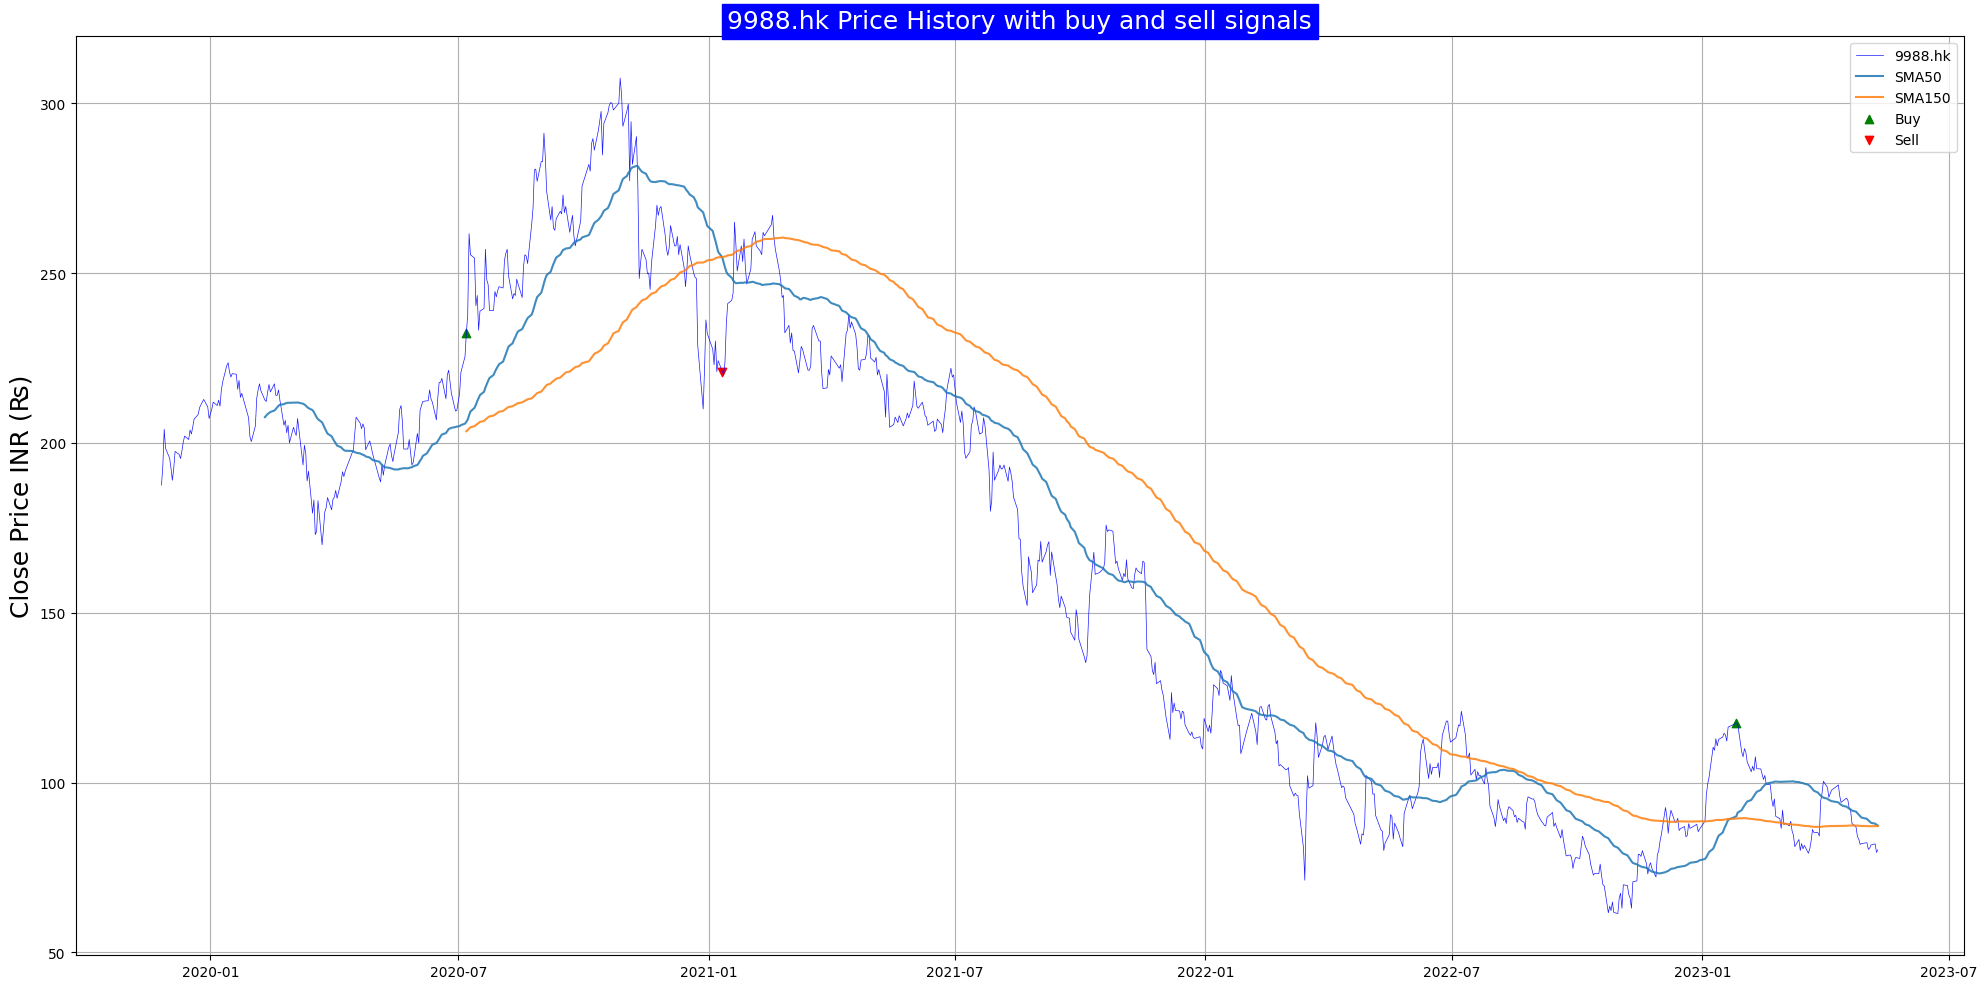

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['ClosingPrice'] , label = stock_symbol ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA'+str(window1)], label = 'SMA'+str(window1), alpha = 0.85)
ax.plot(data['SMA'+str(window2)], label = 'SMA'+str(window2), alpha = 0.85)
ax.scatter(data.index , data['BuySignalPrice'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['SellSignalPrice'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stock_symbol + " Price History with buy and sell signals",fontsize=18, backgroundcolor='blue', color='white')
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

## **Backtest the strategy**

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [ ]:
class DualMACrossover(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, window1)
        self.ma2 = self.I(SMA, price, window2)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(mystock, DualMACrossover,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

Row(id='1449', ...)

In [ ]:
stats

Start                     2019-11-26 00:00:00
End                       2023-05-10 00:00:00
Duration                   1261 days 00:00:00
Exposure Time [%]                   67.294118
Equity Final [$]                  9979.900894
Equity Peak [$]                  17179.749966
Return [%]                          -0.200991
Buy & Hold Return [%]               -57.24947
Return (Ann.) [%]                    -0.05963
Volatility (Ann.) [%]               25.455499
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -42.522446
Avg. Drawdown [%]                   -7.033788
Max. Drawdown Duration      219 days 00:00:00
Avg. Drawdown Duration       36 days 00:00:00
# Trades                                    2
Win Rate [%]                             50.0
Best Trade [%]                      46.742083
Worst Trade [%]                    -31.988101
Avg. Trade [%]                    

**A return of -35.3% in 2 years,there are some improvements that can be done.**

## **Optimization Strategy**

In [ ]:
from backtesting import Strategy
from backtesting.lib import crossover


class SmaCross(Strategy):
   
    n1 = window1
    n2 = window2
    
    def init(self):
       
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
       
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

In [ ]:
%%script echo

    def next(self):
        if (self.sma1[-2] < self.sma2[-2] and
                self.sma1[-1] > self.sma2[-1]):
            self.position.close()
            self.buy()

        elif (self.sma1[-2] > self.sma2[-2] and    
              self.sma1[-1] < self.sma2[-1]):
            self.position.close()
            self.sell()

In [ ]:
bt = Backtest(mystock, SmaCross)
stats = bt.run()

In [ ]:
stats2 = bt.optimize(n1=range(5, 30, 5),
                    n2=range(10, 50, 5),
                    maximize='Equity Final [$]',
                    constraint=lambda param: param.n1 < param.n2)

Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
stats2._strategy

<Strategy SmaCross(n1=25,n2=45)>

In [ ]:
bt.plot(plot_volume=False, plot_pl=False) 

Row(id='2058', ...)

In [ ]:
bt.plot(relative_equity=False, plot_equity=True, superimpose=True)

Row(id='2700', ...)

In [ ]:
stats2

Start                     2019-11-26 00:00:00
End                       2023-05-10 00:00:00
Duration                   1261 days 00:00:00
Exposure Time [%]                   92.823529
Equity Final [$]                 16092.753197
Equity Peak [$]                  21681.201408
Return [%]                          60.927532
Buy & Hold Return [%]               -57.24947
Return (Ann.) [%]                   15.148907
Volatility (Ann.) [%]               55.019046
Sharpe Ratio                         0.275339
Sortino Ratio                         0.47135
Calmar Ratio                         0.436212
Max. Drawdown [%]                  -34.728317
Avg. Drawdown [%]                   -9.544508
Max. Drawdown Duration      487 days 00:00:00
Avg. Drawdown Duration       46 days 00:00:00
# Trades                                   18
Win Rate [%]                        61.111111
Best Trade [%]                      43.846566
Worst Trade [%]                    -20.061728
Avg. Trade [%]                    

**A return of 22.8% in 2 years, it shows a simple, optimized moving average cross-over strategy. It's a common introductory strategy and a pretty decent strategy overall.**